In [1]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [14]:
print(X_train[2])
print(Y_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

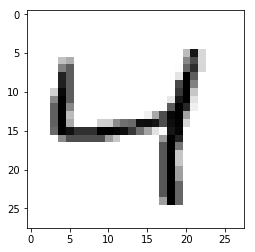

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap = plt.cm.binary)
#plt.imshow(X_train[0])
plt.show()

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, Y_train, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 6s 97us/step - loss: 9.1407 - acc: 0.4326
Epoch 2/6
60000/60000 [==============================] - 6s 97us/step - loss: 8.9874 - acc: 0.4422
Epoch 3/6
60000/60000 [==============================] - 6s 98us/step - loss: 9.0934 - acc: 0.4356
Epoch 4/6
60000/60000 [==============================] - 6s 98us/step - loss: 9.1131 - acc: 0.4345
Epoch 5/6
60000/60000 [==============================] - 6s 100us/step - loss: 8.9562 - acc: 0.4442
Epoch 6/6
60000/60000 [==============================] - 6s 101us/step - loss: 8.7184 - acc: 0.4590


In [20]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_loss)

10000/10000 [==============================] - 0s 35us/step
8.549460787200928


The model has fit the data properly. It has low variance but the error is too high. We'll train another model after we normalize the data to optimize our model properly.

In [22]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [23]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model2.fit(X_train, Y_train, epochs = 4)

Epoch 1/4
60000/60000 [==============================] - 6s 107us/step - loss: 0.2609 - acc: 0.9236
Epoch 2/4
60000/60000 [==============================] - 6s 103us/step - loss: 0.1057 - acc: 0.9672
Epoch 3/4
60000/60000 [==============================] - 6s 103us/step - loss: 0.0716 - acc: 0.9781
Epoch 4/4
60000/60000 [==============================] - 6s 102us/step - loss: 0.0510 - acc: 0.9837


In [24]:
test_loss, test_accuracy = model2.evaluate(X_test, Y_test)
print(test_loss)

10000/10000 [==============================] - 0s 46us/step
0.09198677998536732


No overfitting detected. The test error is more than training error but that is expected. It's a harmful difference.

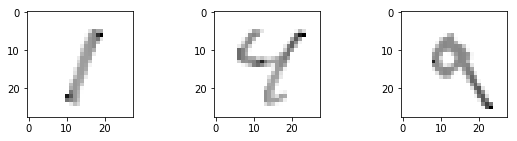

In [37]:
plot = plt.figure(figsize = (100,70))
plot.add_subplot(30,30,1)
plt.imshow(X_test[5], cmap = plt.cm.binary)
plot.add_subplot(30,30,2)
plt.imshow(X_test[6], cmap = plt.cm.binary)
plot.add_subplot(30,30,3)
plt.imshow(X_test[7], cmap = plt.cm.binary)
plt.show()

In [30]:
num = model2.predict(X_test[5:8])

In [38]:
print(num)

[[8.9046949e-08 9.9989522e-01 2.6051091e-06 3.4436830e-08 2.9415410e-06
  7.8818796e-10 1.5178776e-07 9.5183175e-05 3.5320684e-06 1.6700412e-07]
 [4.4840309e-10 8.8778997e-06 1.8013806e-08 1.8856183e-07 9.9959868e-01
  4.6425615e-07 1.5149750e-07 6.9540863e-07 1.2955310e-04 2.6136127e-04]
 [4.0571027e-08 3.1746233e-06 1.3804527e-07 6.2747611e-05 7.8816738e-06
  1.5440586e-04 6.8416885e-09 6.2489624e-07 1.0442433e-06 9.9976987e-01]]


In [40]:
import numpy as np
print(np.argmax(num))

1


In [42]:
l = [np.argmax(i) for i in num]
print(l)

[1, 4, 9]
